The dataset that we’re going to be working with in this lesson is taken from The Trans-Atlantic Slave Trade Database, part of the Slave Voyages project. The larger database includes information about 35,000 slave-trading voyages from 1514-1866. 

In [210]:
from matplotlib import pyplot as plt
import pandas as pd

In [211]:
# set display setting to 100 rows
pd.options.display.max_rows = 100

In [212]:
df = pd.read_csv('data.csv', delimiter=",", encoding='utf-8')

In [213]:
df

,Year of arrival at port of disembarkation,Voyage ID,Vessel name,Vessel owner,Flag of vessel,Rig or type of vessel,Voyage itinerary imputed port where began (ptdepimp) place,Voyage itinerary imputed principal place of slave purchase (mjbyptimp),Voyage itinerary imputed principal port of slave disembarkation (mjslptimp) place,VOYAGEID2,...,Total disembarked,Captives arrived at 1st port,Percent men,Percent women,Percent children,Duration of captives' crossing (in days),"Voyage duration, homeport to disembarkation (in days)",Captain's name,particular outcome label,Sources
0,1714.0,16109,Freeke Gally,"Freeke, Phillip*",Great Britain,NaN,Bristol,NaN,Kingston,NaN,...,283.0,283.0,NaN,NaN,NaN,NaN,282.0,"Neale, Alexander",Voyage completed as intended,"['JRL, English MS, 1390, 1, f. 3v<><p><em>John..."
1,1713.0,16110,Greyhound Gally,"Hollister, Lawrence*",Great Britain,NaN,Bristol,NaN,"Jamaica, place unspecified",NaN,...,179.0,NaN,NaN,NaN,NaN,NaN,NaN,"Selkirk, Alexander<br/> Forrest, Henry",Sold slaves in Americas - subsequent fate unknown,"['JRL, English, MS, 1390, 1, f. 3v<><p><em>Joh..."
2,1714.0,16111,Jacob,"Crow, Francis*",Great Britain,Sloop,Bristol,NaN,Kingston,NaN,...,130.0,130.0,NaN,NaN,NaN,NaN,236.0,"Nicholls, Philip",Voyage completed as intended,"['JRL, English MS 1390, 1, f. 3r<><p><em>John ..."
3,1714.0,16112,Jason Gally,"Becher, John*",Great Britain,NaN,Bristol,NaN,Port Royal,NaN,...,278.0,278.0,NaN,NaN,NaN,NaN,305.0,"Plummer, John",Voyage completed as intended,"['JRL, English MS 1390, 1, f. 3r<><p><em>John ..."
4,1713.0,16113,Lawford Gally,"Norman, John*",Great Britain,NaN,Bristol,"Africa, port unspecified",Newcastle (Nevis),NaN,...,190.0,NaN,NaN,NaN,NaN,NaN,NaN,"Stretton, Joseph",Voyage completed as intended,"['Richardson,I<><p>Richardson, David, <em>Bris..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36146,1850.0,900234,Duas Clementinas,NaN,France,Brig,Rio de Janeiro,Benguela,Rio de Janeiro,NaN,...,444.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Arrived in Africa, subsequent fate unknown","['AHNA, Códice E-20-5 (Benguela)<><i>Arquivo H..."
36147,1851.0,900235,NaN,NaN,NaN,NaN,Havana,Benguela,NaN,NaN,...,367.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Left home port, no further record","['TobiasMonteiro,63/3/4,84<><i>Biblioteca Naci..."
36148,1851.0,900236,Rio Tâmega,NaN,Portugal / Brazil,Patacho,"Southeast Brazil, port unspecified",Benguela,Rio de Janeiro,NaN,...,105.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Arrived in Africa, subsequent fate unknown","['AHNA, Códice E-20-5 (Benguela)<><i>Arquivo H..."
36149,1851.0,900237,Rosa,NaN,NaN,Brig,Rio de Janeiro,Benguela,Rio de Janeiro,NaN,...,458.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Arrived in Africa, subsequent fate unknown","['AHNA, Códice E-20-5 (Benguela)<><i>Arquivo H..."


## Examine

In [214]:
df.shape

(36151, 21)

In [215]:
df.dtypes

Year of arrival at port of disembarkation                                            float64
Voyage ID                                                                              int64
Vessel name                                                                           object
Vessel owner                                                                          object
Flag of vessel                                                                        object
Rig or type of vessel                                                                 object
Voyage itinerary imputed port where began (ptdepimp) place                            object
Voyage itinerary imputed principal place of slave purchase (mjbyptimp)                object
Voyage itinerary imputed principal port of slave disembarkation (mjslptimp) place     object
VOYAGEID2                                                                             object
Total embarked                                                        

In [216]:
df.columns

Index(['Year of arrival at port of disembarkation', 'Voyage ID', 'Vessel name',
       'Vessel owner', 'Flag of vessel', 'Rig or type of vessel',
       'Voyage itinerary imputed port where began (ptdepimp) place',
       'Voyage itinerary imputed principal place of slave purchase (mjbyptimp) ',
       'Voyage itinerary imputed principal port of slave disembarkation (mjslptimp) place',
       'VOYAGEID2', 'Total embarked', 'Total disembarked',
       'Captives arrived at 1st port', 'Percent men', 'Percent women',
       'Percent children', 'Duration of captives' crossing (in days)',
       'Voyage duration, homeport to disembarkation (in days)',
       'Captain's name', ' particular outcome label', 'Sources'],
      dtype='object')

In [217]:
df = df.rename(columns={
    'Year of arrival at port of disembarkation': 'year_arrival',
    'Flag of vessel': 'national_affiliation',
    'Voyage ID': 'id',
    'Vessel name': 'vessel_name',
    'Vessel owner': 'vessel_owner',
    'Rig or type of vessel': 'vessel_type',
    'Voyage itinerary imputed port where began (ptdepimp) place': 'start_place',
    'Voyage itinerary imputed principal place of slave purchase (mjbyptimp) ': 'purchase_place',
    'Voyage itinerary imputed principal port of slave disembarkation (mjslptimp) place': 'end_place',
    'VOYAGEID2': 'alternative_id',
    'Total embarked': 'total_embarked',
    'Total disembarked': 'total_disembarked',
    'Captives arrived at 1st port': 'captives_arrived',
    'Percent men': 'percent_men',
    'Percent women': 'percent_women',
    'Percent children': 'percent_children',
    'Duration of captives\' crossing (in days)': 'crossing_duration',
    'Voyage duration, homeport to disembarkation (in days)': 'voyage_duration',
    'Captain\'s name': 'captain_name',
    ' particular outcome label': 'outcome',
    'Sources': 'sources'
    })

In [218]:
df = df.drop(columns=[
    'alternative_id',
    'captives_arrived',
    'crossing_duration'
    ])

In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36151 entries, 0 to 36150
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year_arrival          36150 non-null  float64
 1   id                    36151 non-null  int64  
 2   vessel_name           34537 non-null  object 
 3   vessel_owner          21778 non-null  object 
 4   national_affiliation  33910 non-null  object 
 5   vessel_type           23787 non-null  object 
 6   start_place           31643 non-null  object 
 7   purchase_place        33941 non-null  object 
 8   end_place             31960 non-null  object 
 9   total_embarked        34515 non-null  float64
 10  total_disembarked     34231 non-null  float64
 11  percent_men           3477 non-null   float64
 12  percent_women         3478 non-null   float64
 13  percent_children      4215 non-null   float64
 14  voyage_duration       13541 non-null  float64
 15  captain_name       

In [219]:
df.describe(include='all')

,year_arrival,id,vessel_name,vessel_owner,national_affiliation,vessel_type,start_place,purchase_place,end_place,total_embarked,total_disembarked,percent_men,percent_women,percent_children,voyage_duration,captain_name,outcome,sources
count,36150.000000,36151.000000,34537,21778,33910,23787,31643,33941,31960,34515.000000,34231.000000,3477.000000,3478.000000,4215.000000,13541.000000,32123,36150,36137
unique,NaN,NaN,9496,9680,11,73,241,188,280,NaN,NaN,NaN,NaN,NaN,NaN,18977,166,24105
top,NaN,NaN,Mary,Royal African Company,Great Britain,Ship,Liverpool,"Africa, port unspecified","Bahia, place unspecified",NaN,NaN,NaN,NaN,NaN,NaN,"Smith, John",Voyage completed as intended,"['mettas,I<>Mettas, Jean, <i>Répertoire des E..."
freq,NaN,NaN,252,642,12036,4854,4973,7216,4226,NaN,NaN,NaN,NaN,NaN,NaN,38,16925,1212
mean,1764.436293,42836.879533,NaN,NaN,NaN,NaN,NaN,NaN,NaN,308.479270,268.667436,0.491053,0.263807,0.215463,290.432317,NaN,NaN,NaN
std,59.235218,72670.177399,NaN,NaN,NaN,NaN,NaN,NaN,NaN,155.289558,137.799831,0.147106,0.120455,0.167172,130.751558,NaN,NaN,NaN
min,1514.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,39.000000,NaN,NaN,NaN
25%,1732.000000,16149.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,201.000000,174.000000,0.397010,0.183063,0.074715,210.000000,NaN,NaN,NaN
50%,1773.000000,32514.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,300.000000,260.000000,0.489360,0.255455,0.195650,269.000000,NaN,NaN,NaN
75%,1806.000000,50318.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,390.000000,350.000000,0.584690,0.338915,0.318590,345.000000,NaN,NaN,NaN


<Axes: title={'center': 'Most ships belonged to Great Britain and Brazil'}, ylabel='national_affiliation'>

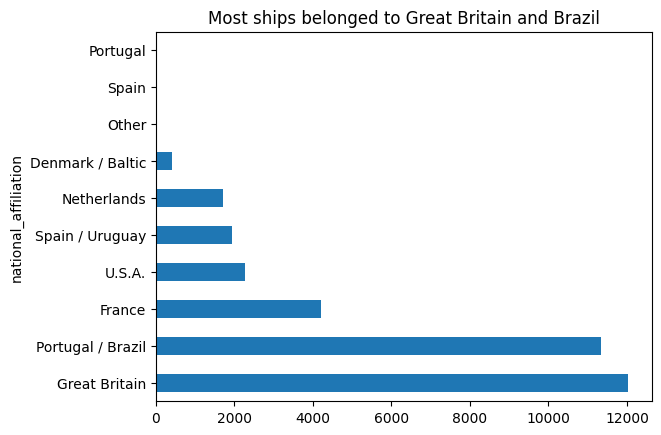

In [246]:
df['national_affiliation']\
    .value_counts()[:10]\
    .plot(
        kind='barh', 
        title='Most ships belonged to Great Britain and Brazil'
    )

In [250]:
luanda_filter = df['purchase_place'] == 'Luanda'
luanda_voyages = df[luanda_filter]
luanda_voyages['national_affiliation'].value_counts()

national_affiliation
Portugal / Brazil    3461
Spain / Uruguay        43
Netherlands            42
France                  3
Denmark / Baltic        1
Great Britain           1
Other                   1
U.S.A.                  1
Name: count, dtype: int64

In [220]:
df[df['percent_women'].notna()]

,year_arrival,id,vessel_name,vessel_owner,national_affiliation,vessel_type,start_place,purchase_place,end_place,total_embarked,total_disembarked,percent_men,percent_women,percent_children,voyage_duration,captain_name,outcome,sources
46,1717.0,16159,Charfield,"Jacob, Samuel*",Great Britain,NaN,Bristol,Gambia,Rappahannock,174.0,156.0,0.473333,0.220000,0.306667,NaN,"Roberts, William",Voyage completed as intended,"['VHSTayloe,v. Mss1 T2118 b, Account book 1708..."
192,1723.0,16315,Greyhound,"Hobhouse, Isaac*<br/> Challoner, William",Great Britain,NaN,Bristol,"Bight of Biafra and Gulf of Guinea Islands, po...",York River,339.0,209.0,0.557520,0.377580,0.064900,184.0,"Hallden, Edward",Voyage completed as intended,"['Richardson,I<><p>Richardson, David, <em>Bris..."
482,1731.0,16614,Burroughs,"Tonge, Henry*",Great Britain,NaN,Bristol,Cape Coast Castle,"Jamaica, place unspecified",NaN,NaN,0.809524,0.142857,0.047619,322.0,"Wallington, John",Voyage completed as intended,"['JRL, English MS, 1390, 1, f. 9r<><p><em>John..."
489,1730.0,16621,Freke,"Freke, William*",Great Britain,NaN,Bristol,Bonny,"Barbados, place unspecified",455.0,345.0,0.428570,0.227960,0.343470,314.0,"Bartlett, John",Voyage completed as intended,"['Richardson,II<><p>Richardson, David, <em>Bri..."
1013,1715.0,32452,Saint Jean d'Afrique,"Feray<br/> Cossart, Jean",France,NaN,Le Havre,"West Central Africa and St. Helena, port unspe...",Cap Français,521.0,495.0,0.672730,0.129290,0.197980,331.0,"Chauvel, Louis (a) Schovel",Voyage completed as intended,"['mettas,II<>Mettas, Jean, <i>Répertoire des ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35860,1771.0,91595,Andromache,"Davenport, William<br/> Lace, Ambrose<br/> Was...",Great Britain,Brig,Liverpool,Calabar,"Dominica, place unspecified",190.0,186.0,0.532260,0.252690,0.215050,NaN,"Sharpe, James",Voyage completed as intended,"['LST,1744-1786<>Richardson, David, Katherine ..."
35882,1772.0,91617,Barbados Packet,"Dillon, Gerard<br/> Mackmillan, Robert<br/> Sa...",Great Britain,Brigantine,Liverpool,"Windward Coast, place unspecified",Zion Hill,108.0,96.0,0.458330,0.270830,0.270830,401.0,"Barwis, David<br/> Hudson, Harrison",Voyage completed as intended,"['LST,1744-1786<>Richardson, David, Katherine ..."
35886,1771.0,91621,Fox,"Hasell, Chris<br/> Dobson, John<br/> Davenport...",Great Britain,Brigantine,Liverpool,Calabar,"St. Kitts, port unspecified",174.0,154.0,0.331080,0.189190,0.479730,206.0,"Beard, John",Voyage completed as intended,"['LST,1744-1786<>Richardson, David, Katherine ..."
35907,1771.0,91643,True Blue,"Hasell, Chris<br/> Welch, John<br/> Goad, John...",Great Britain,Ship,Liverpool,Benin,Kingston,365.0,206.0,0.421570,0.382350,0.196080,NaN,"Griffith, Richard<br/> Goad, William",Voyage completed as intended,"['LST,1744-1786<>Richardson, David, Katherine ..."


In [221]:
df['percent_women'].isna().value_counts()

percent_women
True     32673
False     3478
Name: count, dtype: int64

In [222]:
df['percent_women'].isna().value_counts(normalize=True)

percent_women
True     0.903792
False    0.096208
Name: proportion, dtype: float64

In [223]:
df.count() / len(df)

year_arrival            0.999972
id                      1.000000
vessel_name             0.955354
vessel_owner            0.602418
national_affiliation    0.938010
vessel_type             0.657990
start_place             0.875301
purchase_place          0.938868
end_place               0.884070
total_embarked          0.954745
total_disembarked       0.946889
percent_men             0.096180
percent_women           0.096208
percent_children        0.116594
voyage_duration         0.374568
captain_name            0.888578
outcome                 0.999972
sources                 0.999613
dtype: float64

In [224]:
df['total_men'] = df['total_embarked'] * df['percent_men']
df['total_women'] = df['total_embarked'] * df['percent_women']

In [225]:
df.sort_values(by='percent_women', ascending=False)

,year_arrival,id,vessel_name,vessel_owner,national_affiliation,vessel_type,start_place,purchase_place,end_place,total_embarked,total_disembarked,percent_men,percent_women,percent_children,voyage_duration,captain_name,outcome,sources,total_men,total_women
13259,1819.0,14378,S José Diligente,NaN,Spain / Uruguay,Balandra,NaN,Luanda,Havana,82.0,73.0,0.00000,1.00000,0.00000,NaN,Estepa,Sold slaves in Americas - subsequent fate unknown,"['AGI, Santo Domingo 2207<><p><em>Archivo Gene...",0.00000,82.00000
8820,1642.0,11330,Prinses,NaN,Netherlands,NaN,"Pernambuco, place unspecified",Luanda,"Pernambuco, place unspecified",152.0,114.0,0.01190,0.98810,0.44737,NaN,NaN,Sold slaves in Americas - subsequent fate unknown,"['Ratelband,157,164<>Ratelband, Klaas, <i>Nede...",1.80880,150.19120
4458,1715.0,31883,Elisabeth,Compagnie du Sénégal,France,NaN,Gorée,"Senegambia and offshore Atlantic, port unspeci...",Cap Français,120.0,118.0,0.09091,0.74747,0.16162,NaN,Beliveau,Some slaves removed by pirates/privateers,"['mettas,II<>Mettas, Jean, <i>Répertoire des ...",10.90920,89.69640
14500,1659.0,21566,S Jan,"Clement, Nicolaes*",Netherlands,Yaght,Zeeland,Bonny,"Jamaica, place unspecified",195.0,85.0,0.27500,0.72500,0.05882,NaN,"Veer, Adriaen Blaes van der",Completed voyage after slaves removed for salvage,"['BDB34<>Binder, Franz, Dataset of 17th centur...",53.62500,141.37500
13600,1819.0,14868,Descubridor,NaN,Spain / Uruguay,Bergantim,NaN,"Africa, port unspecified",Havana,178.0,161.0,0.28571,0.71429,0.00000,NaN,Benoit<br/> Valdes,Sold slaves in Americas - subsequent fate unknown,"['Klein,Havana dataset<><p><em>University of W...",50.85638,127.14362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36146,1850.0,900234,Duas Clementinas,NaN,France,Brig,Rio de Janeiro,Benguela,Rio de Janeiro,490.0,444.0,NaN,NaN,NaN,NaN,NaN,"Arrived in Africa, subsequent fate unknown","['AHNA, Códice E-20-5 (Benguela)<><i>Arquivo H...",NaN,NaN
36147,1851.0,900235,NaN,NaN,NaN,NaN,Havana,Benguela,NaN,401.0,367.0,NaN,NaN,NaN,NaN,NaN,"Left home port, no further record","['TobiasMonteiro,63/3/4,84<><i>Biblioteca Naci...",NaN,NaN
36148,1851.0,900236,Rio Tâmega,NaN,Portugal / Brazil,Patacho,"Southeast Brazil, port unspecified",Benguela,Rio de Janeiro,118.0,105.0,NaN,NaN,NaN,NaN,NaN,"Arrived in Africa, subsequent fate unknown","['AHNA, Códice E-20-5 (Benguela)<><i>Arquivo H...",NaN,NaN
36149,1851.0,900237,Rosa,NaN,NaN,Brig,Rio de Janeiro,Benguela,Rio de Janeiro,550.0,458.0,NaN,NaN,NaN,NaN,NaN,"Arrived in Africa, subsequent fate unknown","['AHNA, Códice E-20-5 (Benguela)<><i>Arquivo H...",NaN,NaN


In [226]:
df['percent_women'].mean()

0.2638072972484186

## Grouping

In [227]:
df.groupby('national_affiliation').count()

,year_arrival,id,vessel_name,vessel_owner,vessel_type,start_place,purchase_place,end_place,total_embarked,total_disembarked,percent_men,percent_women,percent_children,voyage_duration,captain_name,outcome,sources,total_men,total_women
national_affiliation,,,,,,,,,,,,,,,,,,,
Denmark / Baltic,410,410,397,150,78,203,403,307,405,402,120,120,120,15,182,410,410,120,120
France,4205,4205,4158,3776,531,4006,4123,3603,4117,4059,735,736,738,2566,3997,4205,4204,735,736
Great Britain,12035,12036,11748,9377,7793,11135,11088,10770,11549,11381,1133,1133,1161,6324,11637,12035,12035,1132,1132
Netherlands,1701,1701,1658,1255,552,1581,1601,1617,1667,1662,223,223,224,749,1505,1701,1701,223,223
Other,16,16,15,5,13,15,8,8,8,8,1,1,1,1,8,16,16,1,1
Portugal,1,1,1,0,1,1,1,1,1,1,0,0,0,0,1,1,1,0,0
Portugal / Brazil,11335,11335,10914,5341,9964,10449,10939,10561,10941,10924,390,390,1095,2631,9638,11335,11330,389,389
Spain,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1,1,1,0,0
Spain / Uruguay,1931,1931,1867,568,1727,1301,1821,1720,1826,1824,596,596,593,640,1659,1931,1930,596,596


In [228]:
df.groupby('national_affiliation').count()['percent_women'].sort_values(ascending=False)

national_affiliation
Great Britain        1133
France                736
Spain / Uruguay       596
Portugal / Brazil     390
U.S.A.                232
Netherlands           223
Denmark / Baltic      120
Other                   1
Portugal                0
Spain                   0
Sweden                  0
Name: percent_women, dtype: int64

<Axes: title={'center': 'Trans-Atlantic Slave Trade (Americas):\nMost women were enslaved by Great Britain'}, xlabel='national_affiliation'>

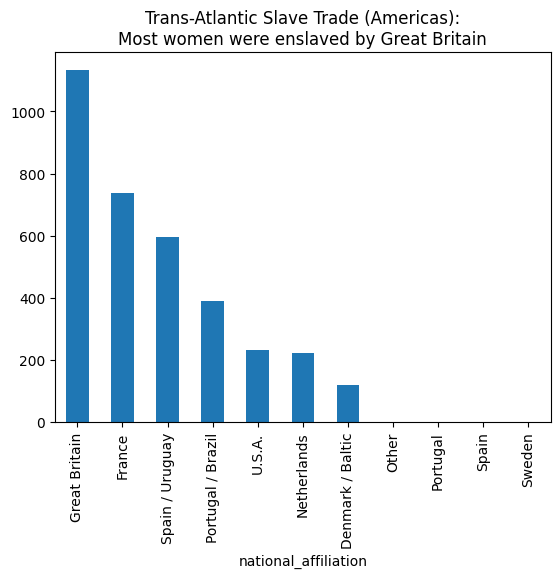

In [229]:
df.groupby('national_affiliation')['percent_women'].count()\
    .sort_values(ascending=False)\
    .plot(
        kind='bar', 
        title='Trans-Atlantic Slave Trade (Americas):\nMost women were enslaved by Great Britain'
    )

## Time series

In [230]:
df['year_arrival'].dtype

dtype('float64')

<Axes: xlabel='year_arrival'>

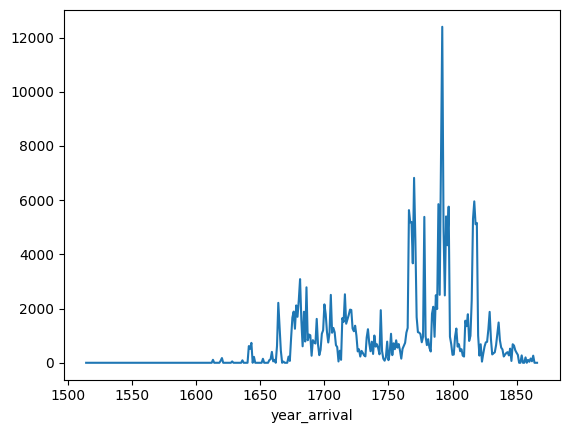

In [231]:
total_women_by_year = df.groupby('year_arrival')['total_women'].sum()
total_women_by_year.plot()

<Axes: title={'center': 'Most people were enslaved around 1790'}, xlabel='year_arrival'>

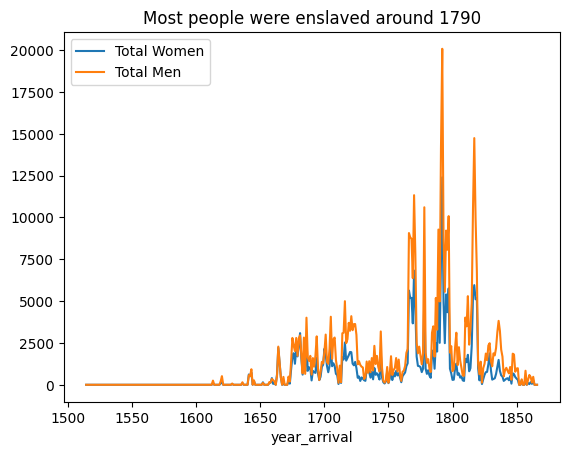

In [234]:
total_men_by_year = df.groupby('year_arrival')['total_men'].sum()
ax = total_women_by_year.plot(
    kind='line', 
    legend=True,
    label="Total Women",
    title="Most people were enslaved around 1790"
)
total_men_by_year.plot(
    ax=ax,
    label="Total Men",
    legend=True
)